### Analysing Raster with Rasterio :

In [1]:
!pip install rasterio

In [2]:
! pip show rasterio

Name: rasterio
Version: 1.3.10
Summary: Fast and direct raster I/O for use with Numpy and SciPy
Home-page: https://github.com/rasterio/rasterio
Author: Sean Gillies
Author-email: sean@mapbox.com
License: BSD
Location: C:\Users\Proprietaire\AppData\Local\Programs\Python\Python311\Lib\site-packages
Requires: affine, attrs, certifi, click, click-plugins, cligj, numpy, setuptools, snuggs
Required-by: 


In [3]:
nepal_gray = r"data\Raster\nepal_land_cover.tif"
world_color = r"data\Raster\NE1_50M_SR_W.tif"

In [4]:
#open the image_dataset with rasterio :
import rasterio
raster = rasterio.open(nepal_gray)

In [5]:
#read the image data :
data = raster.read()
print(data)
print(data.ndim)

[[[255 255 255 ... 255 255 255]
  [255 255 255 ... 255 255 255]
  [255 255 255 ... 255 255 255]
  ...
  [255 255 255 ... 255 255 255]
  [255 255 255 ... 255 255 255]
  [255 255 255 ... 255 255 255]]]
3


In [6]:
#showing shome attributes :
print(data.shape)
print(data.dtype)
print(len(data))
print(data.ndim)
print(data.size)

(1, 1485, 2932)
uint8
1
3
4354020


Reading the metadata of the TIF :

In [7]:
raster.meta

{'driver': 'GTiff',
 'dtype': 'uint8',
 'nodata': 255.0,
 'width': 2932,
 'height': 1485,
 'count': 1,
 'crs': CRS.from_epsg(4326),
 'transform': Affine(0.0027777777777780012, 0.0, 80.05847091000004,
        0.0, -0.0027777777777780012, 30.472819010000357)}

In [8]:
raster.meta['crs']# showing CRS

CRS.from_epsg(4326)

In [9]:
#print the min and max value represented in the image data :
print(data.min(), data.max())

10 255


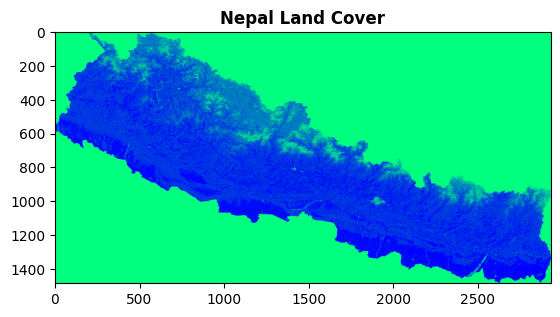

Help on function show in module rasterio.plot:

show(source, with_bounds=True, contour=False, contour_label_kws=None, ax=None, title=None, transform=None, adjust=False, **kwargs)
    Display a raster or raster band using matplotlib.
    
    Parameters
    ----------
    source : array or dataset object opened in 'r' mode or Band or tuple(dataset, bidx)
        If Band or tuple (dataset, bidx), display the selected band.
        If raster dataset display the rgb image
        as defined in the colorinterp metadata, or default to first band.
    with_bounds : bool (opt)
        Whether to change the image extent to the spatial bounds of the image,
        rather than pixel coordinates. Only works when source is
        (raster dataset, bidx) or raster dataset.
    contour : bool (opt)
        Whether to plot the raster data as contours
    contour_label_kws : dictionary (opt)
        Keyword arguments for labeling the contours,
        empty dictionary for no labels.
    ax : matplotlib

In [10]:
#plotting the image :
from rasterio.plot import show, show_hist
show(data, cmap='winter', title='Nepal Land Cover')
print(help(show))

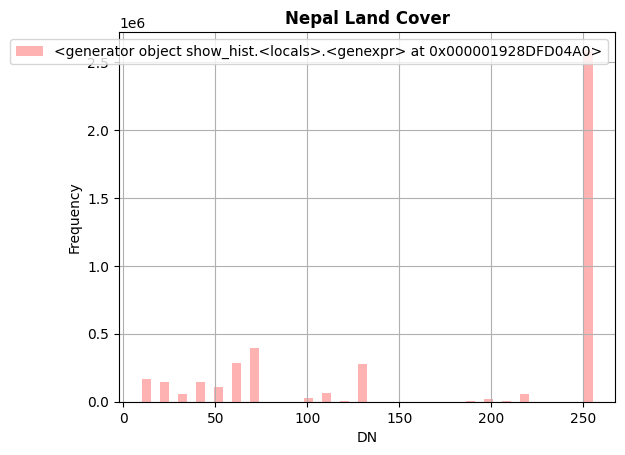

In [11]:
show_hist(data, bins=50, alpha=0.3, histtype='stepfilled', title='Nepal Land Cover')

So now let's write the data in a new raster file :

In [12]:
raster.meta

{'driver': 'GTiff',
 'dtype': 'uint8',
 'nodata': 255.0,
 'width': 2932,
 'height': 1485,
 'count': 1,
 'crs': CRS.from_epsg(4326),
 'transform': Affine(0.0027777777777780012, 0.0, 80.05847091000004,
        0.0, -0.0027777777777780012, 30.472819010000357)}

In [13]:
#writing raster data in a new raster file :
generated_raster = r"data\output raster\generated_raster_gray.tiff"
with rasterio.open(generated_raster, 'w', **raster.meta) as dst:
    dst.write(data)
    pass

### Transform the raster in grayscale to a color image raster :

In [14]:
#transform the raster the a shapefile with geopandas :
import numpy as np
lista = data.copy()
print(type(lista))

# so now let's transform every range of pixel into a category with the 'where' clause of numpy :
lista[np.where((lista>=10)&(lista<=40))] = 1 #short vegetations (Tree or shrub cover)
lista[np.where((lista>40)&(lista<=82))] = 2 #grassland and Tree covered land 
lista[np.where((lista>82)&(lista<=100))] = 3 #cropland Mosaic tree and shrub cover
lista[np.where((lista>100)&(lista<=120))] = 4 #cropland Mosaic tree and shrub cover
lista[np.where((lista>120)&(lista<=150))] = 5 #Sparse vegetation
lista[np.where((lista>150)&(lista<=170))] = 6 #Tree cover, flooded, saline water
lista[np.where((lista>170)&(lista<=188))] = 7 #Shrub or herbaceous cover, flooded
lista[np.where((lista>188)&(lista<=195))] = 8 #Urban areas
lista[np.where((lista>195)&(lista<=203))] = 9 #bare areas
lista[np.where((lista>203)&(lista<=219))] = 10 #water bodies
lista[np.where(lista>219)]= 11 #Permanent snow and ice
lista



<class 'numpy.ndarray'>


array([[[11, 11, 11, ..., 11, 11, 11],
        [11, 11, 11, ..., 11, 11, 11],
        [11, 11, 11, ..., 11, 11, 11],
        ...,
        [11, 11, 11, ..., 11, 11, 11],
        [11, 11, 11, ..., 11, 11, 11],
        [11, 11, 11, ..., 11, 11, 11]]], dtype=uint8)

In [15]:
#let's write our new raster : (openable on Arcgis or any Gis app)
generated_color_raster = r"data\output raster\generated_color_raster.tiff"
with rasterio.open(generated_color_raster, 'w', **raster.meta) as dst:
    dst.write(data)